# Merge and clean CSV files

In [43]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import math
from datetime import time, tzinfo, timedelta
os.getcwd()

'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel'

In [44]:
file_list = glob.glob(os.path.join('sagGaugeFusionData', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)
#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset='blue').drop_duplicates()
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)] #& (df.nir < 1100)]

df
print(df.columns.values.tolist())

['SiteID', 'system:index', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd']


In [45]:
df.describe()

,blue,green,red,nir,swir1,swir2,dswe,pixelCount,elevation,blue_sd,green_sd,red_sd,nir_sd,swir1_sd,swir2_sd,dswe_sd
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,528.427130,780.664623,684.921904,596.924480,265.806206,188.351713,1.0,60.296296,340.0,118.881580,122.138943,145.403139,251.415353,155.169544,149.138541,0.255124
std,129.006360,191.692927,203.827214,466.784572,136.162447,108.664347,0.0,40.560321,0.0,76.236065,66.327116,75.196310,102.570067,64.281135,68.133660,0.120905
min,273.294342,404.130524,289.354972,48.859562,36.958241,13.426503,1.0,1.000000,340.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,471.561181,612.035339,510.587357,226.068581,174.269768,134.186462,1.0,27.500000,340.0,72.800199,74.900758,101.164464,185.119367,121.537682,101.869707,0.196737
50%,520.838826,832.845398,716.382751,431.820648,219.308472,165.411596,1.0,63.000000,340.0,98.908605,118.603288,130.801129,254.392741,170.080662,144.946141,0.276385
75%,562.609319,920.159861,823.738449,880.787827,323.894043,217.997623,1.0,86.500000,340.0,142.581253,157.958668,176.919897,322.629005,187.204025,181.255140,0.328870
max,978.143555,1236.886719,1061.531128,1596.539062,703.619141,617.524719,1.0,145.000000,340.0,333.005687,311.631681,317.895365,401.521511,287.324091,331.968459,0.486504


In [46]:
#Add band ratios

df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'Fusion',
                mission = 'Fusion',
                date = df['system:index'])
df = df.drop(['system:index'], axis=1)

In [47]:
df.date

1     1_2022_06_05_0
2     2_2022_06_10_0
3     1_2022_06_13_0
5     1_2022_06_29_0
6     1_2022_09_06_0
7     2_2022_08_05_0
8     1_2022_08_12_0
9     2_2022_08_21_0
10    1_2022_08_22_0
11    1_2022_08_25_0
13    1_2022_09_08_0
14    1_2022_09_13_0
15    1_2022_06_15_0
16    1_2022_06_16_0
17    2_2022_06_18_0
18    1_2022_07_01_0
19    1_2022_07_02_0
20    1_2022_07_04_0
21    1_2022_07_05_0
22    1_2022_07_07_0
23    1_2022_06_20_0
24    1_2022_06_21_0
25    1_2022_07_09_0
26    1_2022_07_10_0
27    2_2022_07_12_0
28    1_2022_07_16_0
29    1_2022_07_16_0
Name: date, dtype: object

In [48]:
# Column formatting
df['date'] = df['date'].str.slice(2, 12)
df['date'] = df['date'].str.replace('_','-')
df.date.shape[0]

27

In [49]:
#Rename to fusion and add some new colunms for plotting/sorting/exploring data
fusion = df.sort_values(by = 'date')
fusion['date'] = pd.to_datetime(fusion.date, format = '%Y-%m-%d', errors = 'coerce')
fusion['year'] = pd.to_datetime(fusion['date']).dt.year
fusion['month'] = pd.to_datetime(fusion['date']).dt.month
fusion['R_GB_log'] = np.log(fusion['R_GB'])
print(fusion.columns.values.tolist())
print(fusion.shape[0])
print(fusion.date)
fusion1 = fusion.sort_values(by = ['date'])


['SiteID', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'mission', 'date', 'year', 'month', 'R_GB_log']
27
1    2022-06-05
2    2022-06-10
3    2022-06-13
15   2022-06-15
16   2022-06-16
17   2022-06-18
23   2022-06-20
24   2022-06-21
5    2022-06-29
18   2022-07-01
19   2022-07-02
20   2022-07-04
21   2022-07-05
22   2022-07-07
25   2022-07-09
26   2022-07-10
27   2022-07-12
29   2022-07-16
28   2022-07-16
7    2022-08-05
8    2022-08-12
9    2022-08-21
10   2022-08-22
11   2022-08-25
6    20

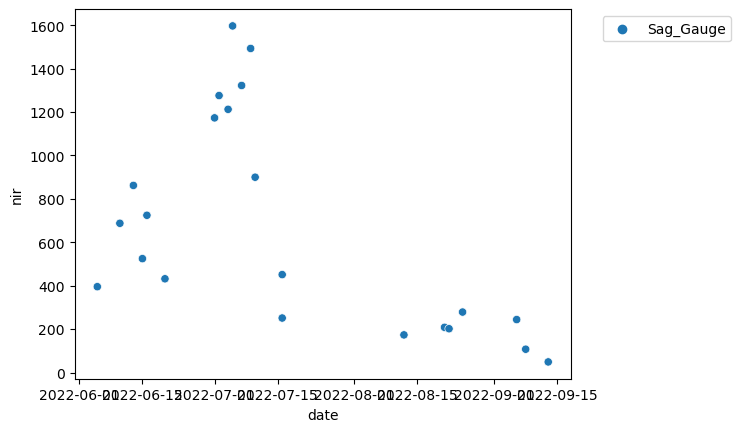

In [50]:
#Generate a first look Plot
fusion = fusion[fusion['pixelCount'] > 10]
plot = sns.scatterplot(data=fusion, x="date", y="nir", hue="SiteID")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
plt.show()

In [51]:
#Read in OBS5 data
obs5 = pd.read_csv(r'sagGaugeData/obs5_obs4.csv', header = 0, index_col = 0,
                         parse_dates=True, infer_datetime_format=True)
obs5['date'] = pd.to_datetime(obs5['date'], format = '%Y-%m-%d')#.dt.strftime('%Y-%m-%d')
#obs5['date'] =obs5['date'].astype(str)
obs5['mission'] = 'OBS TSS'
obs5 = obs5.dropna(subset = ['date', 'timeUTC'])
#obs5 = obs5.dropna(subset='TSS').drop_duplicates('date')

#print(obs5.describe())
print(obs5)

           timestamp       date   timeUTC   R0_V_sd        NTU     NTU_sd  \
7.0     1.654457e+09 2022-06-05  19:26:32  0.003871  45.525305 -42.323456   
6.0     1.654454e+09 2022-06-05  18:26:32  0.003932  46.588265 -42.289293   
8.0     1.654461e+09 2022-06-05  20:26:32  0.003560  46.885894 -42.496897   
5.0     1.654450e+09 2022-06-05  17:26:32  0.003849  47.821299 -42.335554   
9.0     1.654464e+09 2022-06-05  21:26:32  0.003933  48.331520 -42.288769   
...              ...        ...       ...       ...        ...        ...   
2468.0  1.663411e+09 2022-09-17  10:38:17  0.000308  24.473563 -37.553279   
2469.0  1.663415e+09 2022-09-17  11:38:17  0.000273  24.520133 -37.563949   
2470.0  1.663418e+09 2022-09-17  12:38:17       NaN        NaN        NaN   
2471.0  1.663422e+09 2022-09-17  13:38:17  0.000159   3.610247 -37.598762   
2472.0  1.663425e+09 2022-09-17  14:38:17  0.000191   3.610247 -37.588956   

           level        TSS   TSS_ci_1    TSS_ci_2    doy  mission  
7.0   

In [52]:
#Matchup OBS to Landsat/Sentinel Data

#Add time acquisition to HLS data. Landsat acquisition time is about 21:30:00, Sentinel is between 21:46:00 and 22:06:00. I will say it is 21:30 for these purposes to best fit OBS times
fusion['timeUTC'] = '13:30:00'

fusion['datetime'] = fusion['date'].astype(str) + ' ' + fusion['timeUTC'].astype(str)

fusionMerge= fusion.copy()
#sagHLSMerge [['SiteID','sceneID', 'mission', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'pixelCount', 'elevation', 'datetime']]

obs5['SiteID'] = 'Sag_Gauge'
obs5['datetime'] = obs5['date'].astype(str) + ' ' + obs5['timeUTC'].astype(str)

obs5Merge = obs5.loc[:, ['NTU', 'NTU_sd', 'level', 'TSS', 'TSS_ci_1', 'TSS_ci_2', 'doy', 'SiteID', 'datetime']]

#convert to datetime objects
fusionMerge['datetime'] = pd.to_datetime(fusion['datetime'], utc=True, errors='coerce')
obs5Merge['datetime'] = pd.to_datetime(obs5['datetime'], utc=True, errors='coerce')

#sort into chronological order
fusionMerge = fusionMerge.sort_values(by = 'datetime')
obs5Merge = obs5Merge.sort_values(by = 'datetime')

#perform merge
fusion_obs = pd.merge_asof(obs5Merge, fusionMerge, on = 'datetime', by ='SiteID',
                                 tolerance=pd.Timedelta(12, "h"), #7
                                 allow_exact_matches=True).dropna(subset = ['TSS', 'red']).drop_duplicates(['date'])
#to csv
#hls_obs.to_csv(r'hls_obs.csv')
fusion_obs['tss'] = (fusion_obs['TSS'])
print(fusion_obs[['TSS', 'datetime', 'date','red', 'nir']])
print(fusion_obs.shape[0])

              TSS                  datetime       date          red  \
2       89.762587 2022-06-05 14:26:32+00:00 2022-06-05   877.454463   
132      2.700214 2022-06-11 00:26:32+00:00 2022-06-10   697.832214   
204      0.286006 2022-06-14 00:26:32+00:00 2022-06-13   718.794266   
228     44.948852 2022-06-15 14:26:32+00:00 2022-06-15   778.609863   
252    116.318874 2022-06-16 14:26:32+00:00 2022-06-16   716.382751   
350     33.632252 2022-06-20 16:26:32+00:00 2022-06-20   807.833313   
614     25.408857 2022-07-01 16:26:32+00:00 2022-07-01   927.410583   
640     19.901445 2022-07-02 18:26:32+00:00 2022-07-02   839.643585   
684     27.294957 2022-07-04 14:26:32+00:00 2022-07-04   882.778910   
708   3369.690374 2022-07-05 14:26:32+00:00 2022-07-05  1061.531128   
756     74.824675 2022-07-07 14:26:32+00:00 2022-07-07  1012.300232   
804    118.733082 2022-07-09 14:26:32+00:00 2022-07-09   925.756531   
828     44.948852 2022-07-10 14:26:32+00:00 2022-07-10   804.389252   
973   

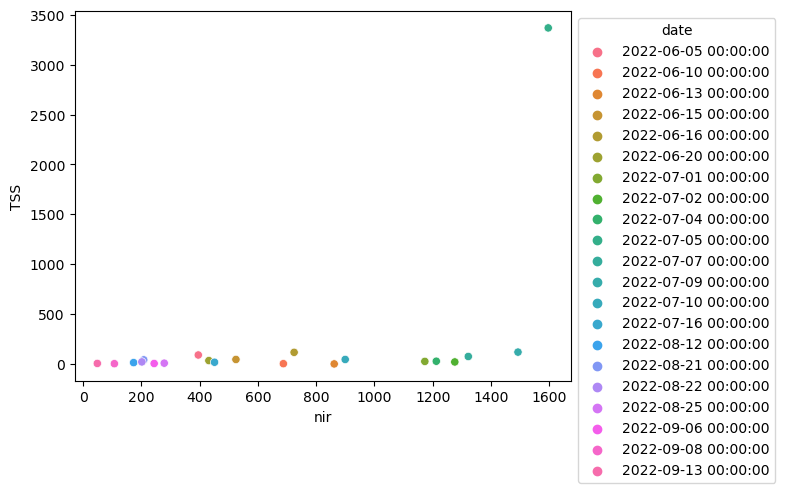

In [53]:
#Generate Plot
#Generate Plot
plot = sns.scatterplot(data=fusion_obs, x="nir", y="TSS", hue="date")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2500x1500 with 0 Axes>

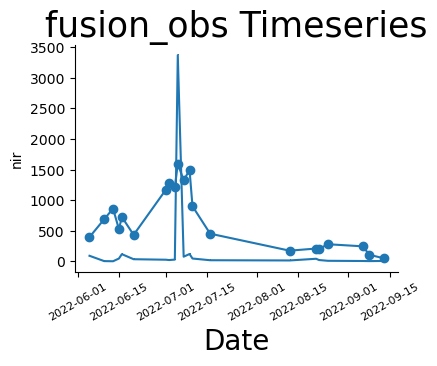

In [54]:
hls_obs = fusion_obs.sort_values(by = ['date'])
hls_obs['date'] = pd.to_datetime(hls_obs['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

plt.figure(figsize = (25,15))

fg = sns.FacetGrid(data=fusion_obs, aspect=1.5) #, hue='mission'
fg.map(plt.scatter, 'date', 'nir')
fg.map(plt.plot, 'date', 'nir')

#fg.map(plt.plot, 'datetime', 'red').add_legend()
#fg.map(plt.plot, 'datetime', 'blue').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
fg.axes[0,0].plot(fusion_obs.date, fusion_obs['TSS'], marker=",")

# obs5['date'] = pd.to_datetime(obs5['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
# obs5 = obs5.sort_values(by = ['date'])

# fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")

plt.xticks(fontsize = 8, rotation=30)
plt.title(label = 'fusion_obs Timeseries', fontsize = 25)
#plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize=20)
#plt.ylabel('Reflectance and TSS (mg/L)',fontsize=12)
plt.show()


In [55]:
# #All unmatched fusion
# fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

# fusUnmatched = pd.merge(fusionMerge_timediff_cute, fusion, on =['SiteID', 'date'], how ="outer")
# fusUnmatched.drop(['Matchup'], axis=1)
# fusUnmatched['Matchup'] = 'Fusion-No Match'
# print(fusUnmatched.columns.values.tolist())
# #Generate Plot
# plot = sns.scatterplot(data=fusUnmatched, x="date", y="red", hue="SiteID")
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plot

In [56]:
#Read in hls_obs
df = pd.read_csv(r'hls_obs.csv')
df.columns = df.columns.str.replace("[.]", "_")

#Add band ratios

df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'HLS')
hls_obs = df


#Add a transformation
hls_obs['R_GB_log'] = np.log(hls_obs['R_GB'])
hls_obs['tss'] = (hls_obs['TSS'])
hls_obs['tss_log'] = np.log(hls_obs['tss'])
hls_obs['date'] = pd.to_datetime(hls_obs['datetime'], format = '%Y-%m-%d').dt.strftime("%Y-%m-%d")
#aquaHuc5['Matchup'] = 'Aquasat'
#aquaHuc5['date'] = pd.to_datetime(aquaHuc5['date'], format = "%m/%d/%Y").dt.strftime("%Y-%m-%d")
hls_obs = hls_obs.drop_duplicates('date')
print(hls_obs.columns.values.tolist())
print(hls_obs.nir)

['Unnamed: 0', 'NTU', 'NTU_sd', 'level', 'TSS', 'TSS_ci_1', 'TSS_ci_2', 'doy', 'SiteID', 'datetime', 'date', 'sceneID', 'mission', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'R_GB_log', 'tss', 'tss_log']
0      953.0
1      782.0
3      712.0
4      696.0
5      663.0
6      528.0
7      624.0
8      839.0
9     1101.5
10    1459.0
11    1060.0
12     868.0
13     495.0
14     232.0
15     335.0
16     326.0
17     142.0
18     162.0
19     337.0
20     247.0
21     307.0
22     283.0
23     294.0
24     297.0

/scratch/ceewater-cpu001/4982722/ipykernel_3696415/3982288958.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("[.]", "_")


<Figure size 2500x1500 with 0 Axes>

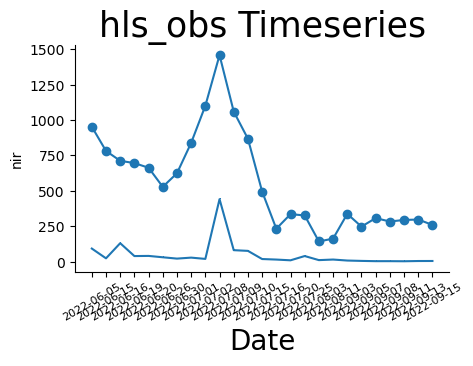

In [57]:
hls_obs = hls_obs.sort_values(by = ['date'])
hls_obs['date'] = pd.to_datetime(hls_obs['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

plt.figure(figsize = (25,15))

fg = sns.FacetGrid(data=hls_obs, aspect=1.5) #, hue='mission'
fg.map(plt.scatter, 'date', 'nir').add_legend()
fg.map(plt.plot, 'date', 'nir').add_legend()

#fg.map(plt.plot, 'datetime', 'red').add_legend()
#fg.map(plt.plot, 'datetime', 'blue').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
fg.axes[0,0].plot(hls_obs.date, hls_obs['TSS'], marker=",")

# obs5['date'] = pd.to_datetime(obs5['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
# obs5 = obs5.sort_values(by = ['date'])

# fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")

plt.xticks(fontsize = 8, rotation=30)
plt.title(label = 'hls_obs Timeseries', fontsize = 25)
#plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize=20)
#plt.ylabel('Reflectance and TSS (mg/L)',fontsize=12)

plt.show()

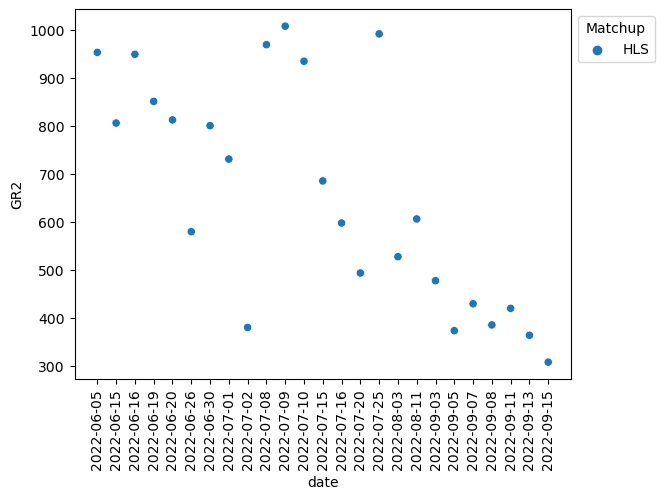

In [58]:
#Generate Plot

plot = sns.scatterplot(data=hls_obs, x="date", y="GR2", hue="Matchup")
plot.tick_params(axis='x', labelrotation=90)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [59]:
#HLSFusion data
#aquaHuc5 = aquaHuc5[['SiteID', 'particle_size', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn']]


#Fuse data
hlsFusion = pd.concat([fusion_obs, hls_obs]).dropna(subset='blue')
hlsFusion['date'] = pd.to_datetime(hlsFusion['date']).dt.strftime("%Y-%m-%d")
hlsFusion['datetime'] = pd.to_datetime(hlsFusion['date']).dt.strftime("%Y-%m-%d")
hlsFusion['month'] = pd.to_datetime(hlsFusion['date']).dt.month
hlsFusion['year'] = pd.to_datetime(hlsFusion['date']).dt.year
hlsFusion['day'] = pd.to_datetime(hlsFusion['date']).dt.day
hlsFusion['R_GB_log'] = np.log(hlsFusion['R_GB'])
hlsFusion['GR2_log'] = np.log(hlsFusion['GR2'])
hlsFusion['GR_log'] = np.log(hlsFusion['GR'])
hlsFusion['nir_log'] = np.log(hlsFusion['nir'])

hlsFusion['tss'] = (hlsFusion['TSS'])
hlsFusion['tss_log'] = np.log(hlsFusion['tss'])
hlsFusion = hlsFusion.sort_values(by = ['date'])

#aquaFusion = aquaFusion[aquaFusion['SiteID'].isin(fusionSites)]





print(hlsFusion.columns.values.tolist())

['NTU', 'NTU_sd', 'level', 'TSS', 'TSS_ci_1', 'TSS_ci_2', 'doy', 'SiteID', 'datetime', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'mission', 'date', 'year', 'month', 'R_GB_log', 'timeUTC', 'tss', 'Unnamed: 0', 'sceneID', 'tss_log', 'day', 'GR2_log', 'GR_log', 'nir_log']


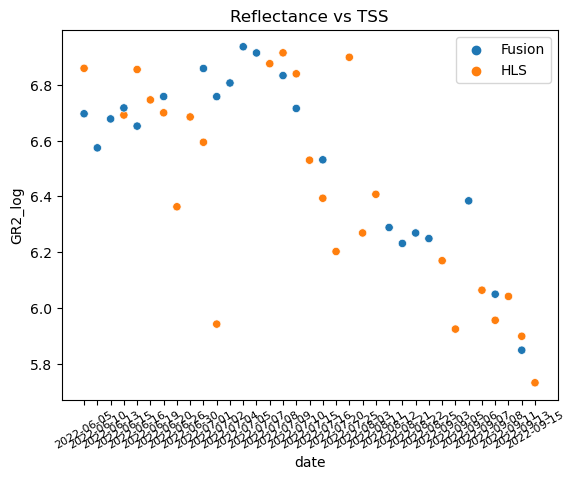

In [60]:
#hlsFusion = hlsFusion[hlsFusion['GR2_log'] > 6]

plot = sns.scatterplot(data=hlsFusion, x="date", y="GR2_log", 
                       legend = 'brief', hue="Matchup") #, style = 'SiteID'
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS')
plt.xticks(fontsize = 8, rotation=30)
plot#.set(xlim = (0, 2500), ylim = (0,2500))
plt.show()

<Figure size 2500x1500 with 0 Axes>

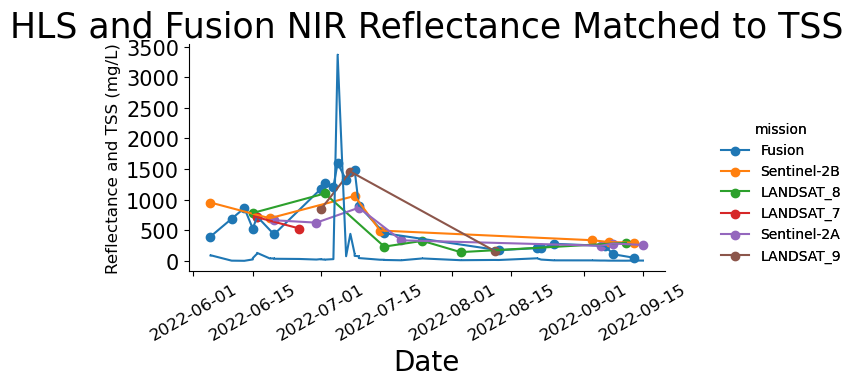

In [61]:
hlsFusion = hlsFusion.sort_values(by = ['date'])
hlsFusion['date'] = pd.to_datetime(hlsFusion['date'], format = '%Y-%m-%d')#.dt.strftime('%Y-%m-%d')

plt.figure(figsize = (25,15))

fg = sns.FacetGrid(data=hlsFusion, aspect=1.5, hue='mission') #, hue='mission'
fg.map(plt.scatter, 'date', 'nir').add_legend()
fg.map(plt.plot, 'date', 'nir').add_legend()

#fg.map(plt.plot, 'datetime', 'red').add_legend()
#fg.map(plt.plot, 'datetime', 'blue').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
fg.axes[0,0].plot(hlsFusion.date, hlsFusion['TSS'], marker=",")

# obs5['date'] = pd.to_datetime(obs5['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
# obs5 = obs5.sort_values(by = ['date'])

# fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")
plt.xticks(fontsize = 12, rotation=30)
plt.title(label = 'HLS and Fusion NIR Reflectance Matched to TSS', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Reflectance and TSS (mg/L)',fontsize=12)

plt.show()


In [62]:

# hlsFusion = hlsFusion[hlsFusion['tss'] < 200] 
# print(hlsFusion.shape[0])


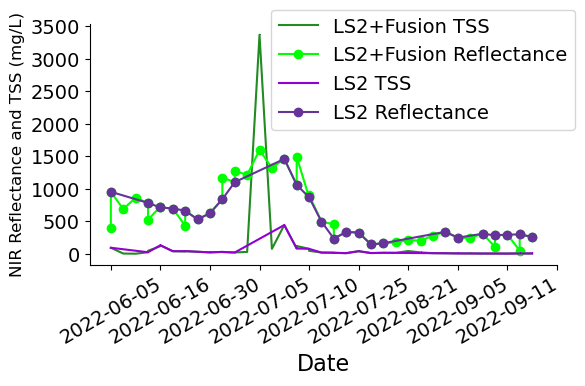

In [63]:

hlsFusion = hlsFusion.sort_values(by = ['date'])
fusion_obs = fusion_obs.sort_values(by =['date'])
fusion1 =fusion1.sort_values(by =['date'])

obs5['date'] = pd.to_datetime(obs5['datetime'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
obs = obs5[obs5['date'] < '2022-09-01']
hlsFusion['date'] = pd.to_datetime(hlsFusion['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
fusion_obs['date'] = pd.to_datetime(fusion_obs['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
fusion1['date'] = pd.to_datetime(fusion1['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
#plt.figure(figsize = (25,15))

fg = sns.FacetGrid(data=hlsFusion, aspect=1.8) #, hue='mission'
#fg.map(plt.scatter, 'date', 'nir')#.add_legend()
#fg.map(plt.plot, 'date', 'nir').add_legend()

#fg.map(plt.plot, 'datetime', 'red').add_legend()
#fg.map(plt.plot, 'datetime', 'blue').add_legend()
#fg.map(plt.plot, 'datetime', 'green').add_legend()
#fg.axes[0,0].plot(hlsFusion.date, hlsFusion['nir'], marker=".") #, label = 'LS2+Fusion Reflectance')
fg.axes[0,0].plot(hlsFusion.date, hlsFusion['TSS'], marker=",", label = 'LS2+Fusion TSS', color="forestgreen")
fg.axes[0,0].plot(hlsFusion.date, hlsFusion['nir'], marker="o", label = 'LS2+Fusion Reflectance', color="lime")
fg.axes[0,0].plot(hls_obs.date, hls_obs['TSS'], marker=",", label = 'LS2 TSS', color = 'darkviolet')
fg.axes[0,0].plot(hls_obs.date, hls_obs['nir'], marker="o", label = 'LS2 Reflectance', color = 'rebeccapurple')
#fg.axes[0,0].plot(fusion_obs.date, fusion_obs['TSS'], marker=",", label='Fusion TSS')
#fg.axes[0,0].plot(fusion_obs.date, fusion_obs['nir'], marker=".", label = 'Fusion Reflectance')
#fg.axes[0,0].plot(obs.date, obs['TSS'], marker=".", label = 'in situ TSS')

# fg.axes[0,0].plot(obs5.date, obs5['TSS'], marker=",")
#plt.grid(False)
plt.legend(bbox_to_anchor=(0.96, 0., 0.1, 1.1), fontsize = 14)
plt.xticks(np.arange(0, 40, 4), fontsize = 14, rotation=30)
#ax.tick_params(labelbottom =False, axis='both', which='major', pad=5)
#plt.title(label = 'HLS NIR Reflectance Matched to TSS', fontsize = 25)
plt.yticks(fontsize = 14)
plt.xlabel('Date',fontsize=16)
plt.ylabel('NIR Reflectance and TSS (mg/L)',fontsize=12)


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(fusion_obs.date, fusion_obs.TSS, marker=".",label = 'Fusion TSS')
#ax.plot(hls_obs.date, hls_obs.TSS, marker=".",label = 'LS2 TSS')
#ax.plot(hls_obs.date, hls_obs.nir, marker=".",label = 'LS2 Reflectance')
ax.plot(fusion_obs.date, fusion_obs.nir, marker=".",label = 'Fusion Reflectance')

ax2.plot(hlsFusion.date, hlsFusion.nir, marker=",", label = 'LS2+Fusion Reflectance')
ax2.plot(hlsFusion.date, hlsFusion.TSS, marker=".",label = 'Fusion TSS')
#ax2.plot(hls_obs.date, hls_obs.TSS, marker=".",label = 'LS2 TSS')
#ax2.plot(hls_obs.date, hls_obs.nir, marker=".",label = 'LS2 Reflectance')
ax2.plot(fusion_obs.date, fusion_obs.nir, marker=".",label = 'Fusion Reflectance')

#ax2.plot(fluxes.date_hourly, fluxes.TSS_hourly_mg, label = 'Modeled TSS')
#ax2.plot(fluxes.date_hourly, fluxes.Qtss_wbm_hourly, label = 'Modeled TSS Flux')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1100, 3600)  # outliers only
ax2.set_ylim(0, 1000)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False, labelsize = 14)  # don't put tick labels at the top
ax2.tick_params(axis='x', rotation=30, labelsize = 14)
ax2.xaxis.tick_bottom()
ax2.legend(bbox_to_anchor=(1.5, 0., 0.1, 2.2), fontsize = 14) #loc='upper right'
#plt.xticks(fontsize = 14, rotation=30)
plt.yticks(fontsize = 14)
plt.xlabel('Date',fontsize=16, labelpad=5)
plt.ylabel('Discharge (m3/s) and TSS Flux (g/hr)',fontsize=16, labelpad=10)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [ ]:
# #CLEAN
# aquaFusPlot = aquaFusion
# #aquaFusPlot = aquaFusion[(aquaFusion.red < 2500) & (aquaFusion.green < 2500) & (aquaFusion.swir2 < 2500) & (aquaFusion.tss < 200) & (aquaFusion.R_GB < 1.0)]

# g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
# g.add_legend()

# # plot = sns.scatterplot(data=aquaFusPlot, x="green", y="blue", 
# #                        legend = 'brief', 
# #                        style = 'Matchup', hue="SiteID")
# # plt.legend(fontsize='10')
# # sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# # plot
# print(aquaFusPlot)
# aquaFusPlot.to_csv(r'aquaFusion_4Sites_modis9GA.csv')

In [ ]:
# #Everything compared
# matchupAll = pd.concat([aquaFusion, fusUnmatched]).dropna(subset='blue')

# matchupAllPlot = matchupAll[(matchupAll.red < 2500) & (matchupAll.green < 2000) & (matchupAll.swir2 < 2500) ] #& (matchupAll.R_GB < 1.0)
# print(matchupAll.Matchup.unique())
# g = sns.FacetGrid(matchupAllPlot, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="month", y="red")
# g.add_legend()


# Model

### REGRESSION

                            OLS Regression Results                            
Dep. Variable:                tss_log   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     84.88
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           5.25e-09
Time:                        15:00:16   Log-Likelihood:                -18.982
No. Observations:                  24   AIC:                             41.96
Df Residuals:                      22   BIC:                             44.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.4942      1.986     -7.803      0.0

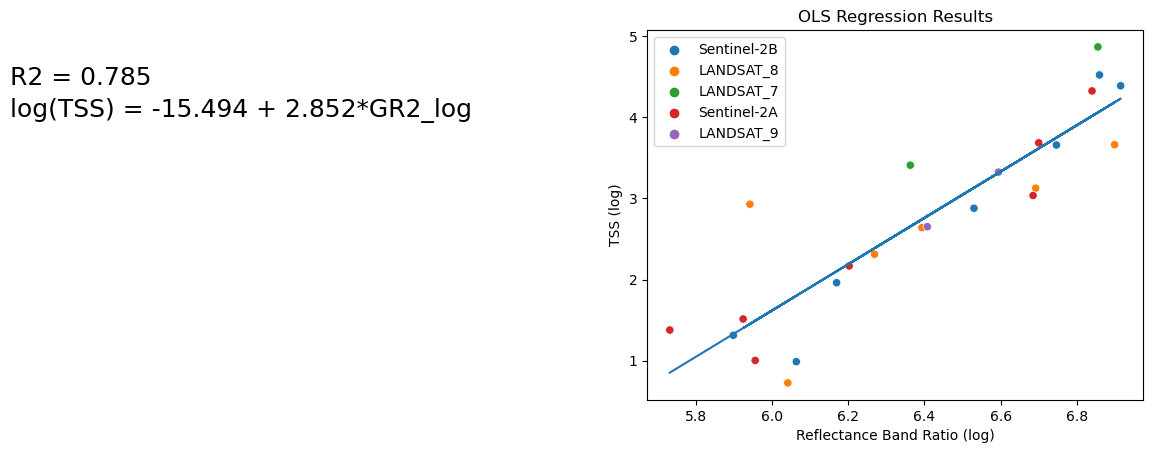

In [27]:
import statsmodels.api as sm

#df = #hls_obs[hls_obs['tss'] < 200]
#hlsFusion#[hlsFusion['tss'] < 200] #aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#df = hlsFusion[hlsFusion['Matchup'] == 'Fusion']
df = hlsFusion[hlsFusion['Matchup'] == 'HLS']
df = df[df['tss_log'] < 6]
# df = df[df['GR2_log'] > 6]

#define predictor and response variables
y = df['tss_log']
x = df['GR2_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['GR2_log'], df['tss_log'], 1)

#add points to plotå
plot = sns.scatterplot(data = df, x = df['GR2_log'], y = df['tss_log'],  hue = 'mission')

#add line of best fit to plot
plt.plot(df['GR2_log'], a*df['GR2_log']+b)

#add fitted regression equation to plot
plt.text(4, 4, 'log(TSS) = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + '*GR2_log', size=18)
plt.text(4, 4.4, 'R2 = 0.785', size=18)
plt.legend(loc ='upper left') #bbox_to_anchor=(1.5, 0., 0.1, 1.0), fontsize = 14) #loc='upper right'

#add axis label
plt.title('OLS Regression Results')
plt.xlabel('Reflectance Band Ratio (log)')
plt.ylabel('TSS (log)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                tss_log   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.088
Date:                Fri, 03 Feb 2023   Prob (F-statistic):             0.0583
Time:                        15:00:16   Log-Likelihood:                -34.066
No. Observations:                  20   AIC:                             72.13
Df Residuals:                      18   BIC:                             74.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4630      7.088     -1.617      0.1

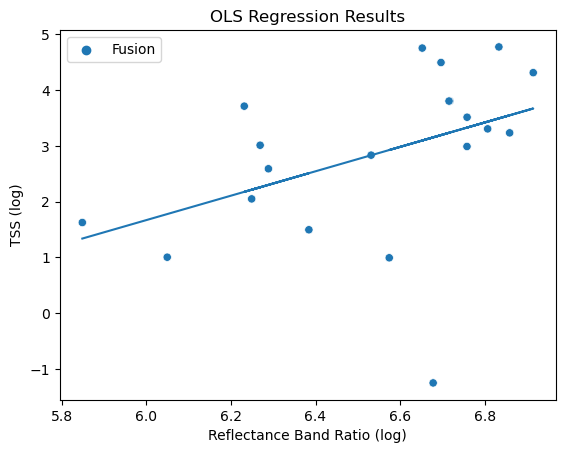

In [28]:
import statsmodels.api as sm

#df = #hls_obs[hls_obs['tss'] < 200]
#hlsFusion#[hlsFusion['tss'] < 200] #aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#df = hlsFusion[hlsFusion['Matchup'] == 'Fusion']
df = hlsFusion[hlsFusion['tss_log'] < 6]
df = df[df['Matchup'] == 'Fusion']
# df = df[df['GR2_log'] > 6.2]


#define predictor and response variables
y = df['tss_log']
x = df['GR2_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
c, d = np.polyfit(df['GR2_log'], df['tss_log'], 1)

#add points to plot
plot = sns.scatterplot(data = df, x = df['GR2_log'], y = df['tss_log'],  hue = 'mission')

#add line of best fit to plot
plt.plot(df['GR2_log'], c*df['GR2_log']+d)

#add fitted regression equation to plot
# plt.text(4.5, 4, 'log(TSS) = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + '*GR2_log', size=18)
# plt.text(4.5, 4.4, 'R2 = 0.384', size=18)

plt.legend(loc ='upper left') #bbox_to_anchor=(1.5, 0., 0.1, 1.0), fontsize = 14) #loc='upper right'

#add axis label
plt.title('OLS Regression Results')
plt.xlabel('Reflectance Band Ratio (log)')
plt.ylabel('TSS (log)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                tss_log   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     32.08
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           1.21e-06
Time:                        15:19:08   Log-Likelihood:                -62.152
No. Observations:                  44   AIC:                             128.3
Df Residuals:                      42   BIC:                             131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6498      2.909     -4.691      0.0

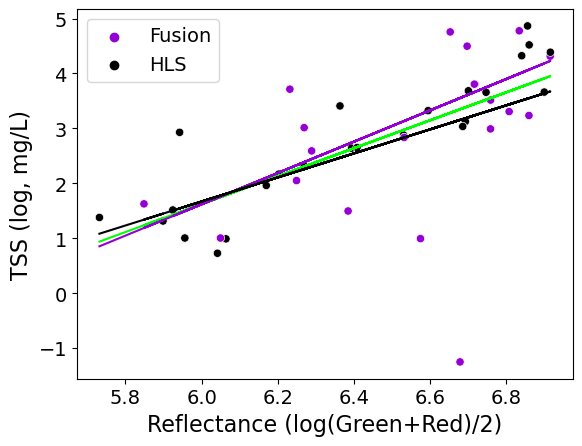

In [64]:
import statsmodels.api as sm

#df = #hls_obs[hls_obs['tss'] < 200]
#hlsFusion#[hlsFusion['tss'] < 200] #aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#df = hlsFusion[hlsFusion['Matchup'] == 'Fusion']
df = hlsFusion[hlsFusion['tss_log'] < 6]
#df = df[df['Matchup'] == 'Fusion']
# df = df[df['GR2_log'] > 6.2]


#define predictor and response variables
y = df['tss_log']
x = df['GR2_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
e, f = np.polyfit(df['GR2_log'], df['tss_log'], 1)

#add points to plot
plot = sns.scatterplot(data = df, x = df['GR2_log'], y = df['tss_log'],  hue = 'Matchup', palette = ['darkviolet', 'black'])

#add line of best fit to plot
plt.plot(df['GR2_log'], e*df['GR2_log']+f, color = 'lime')
plt.plot(df['GR2_log'], a*df['GR2_log']+b, color = 'darkviolet')
plt.plot(df['GR2_log'], c*df['GR2_log']+d, color = 'black')

#add fitted regression equation to plot
# plt.text(4, 4, 'log(TSS) = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + '*GR2_log', size=18)
# plt.text(4, 4.4, 'R2 = 0.685', size=18)

#add legend
plt.legend(fontsize = 14) #loc ='upper left') #bbox_to_anchor=(1.5, 0., 0.1, 1.0), fontsize = 14) #loc='upper right'

#add axis label
#plt.title('OLS Regression Results', fontsize = 20)
plt.xlabel('Reflectance (log(Green+Red)/2)', fontsize = 16)
plt.ylabel('TSS (log, mg/L)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Regression Model Evaluations

In [30]:
#Add equations to obs45
hlsFusion = hlsFusion[hlsFusion['tss'] < 200].copy()
hlsFusion['hlsReg'] = np.exp(-17.078 + 3.111*(hlsFusion.GR2_log))
hlsFusion['fusionReg'] = np.exp(-10.818 + 2.160*(hlsFusion.GR2_log))
hlsFusion['hlsFusionReg'] = np.exp(-15.474 + 2.864*(hlsFusion.GR2_log))

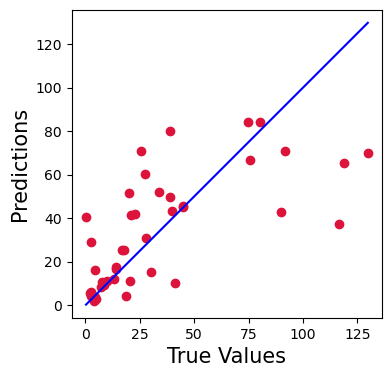

MAE 15.994067691082824


<AxesSubplot: title={'center': 'TSS Prediction Errors (mg/L)'}>

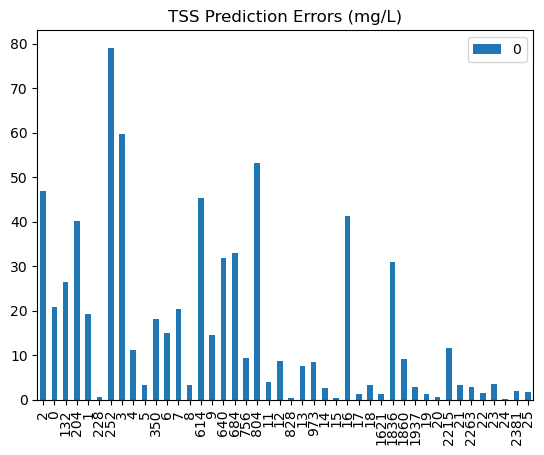

In [31]:
#Just HLS
prediction = hlsFusion.hlsReg
actual = hlsFusion.tss

plt.figure(figsize=(4,4))
plt.scatter(actual, prediction, c='crimson')

p1 = max(max(prediction), max(actual))
p2 = min(min(prediction), min(actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - actual)
print('MAE', errors.mean())
pd.DataFrame(errors).plot(kind='bar', title = 'TSS Prediction Errors (mg/L)')

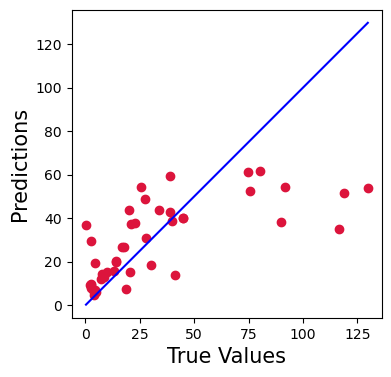

MAE 16.94408506381998


<AxesSubplot: title={'center': 'TSS Prediction Errors (mg/L)'}>

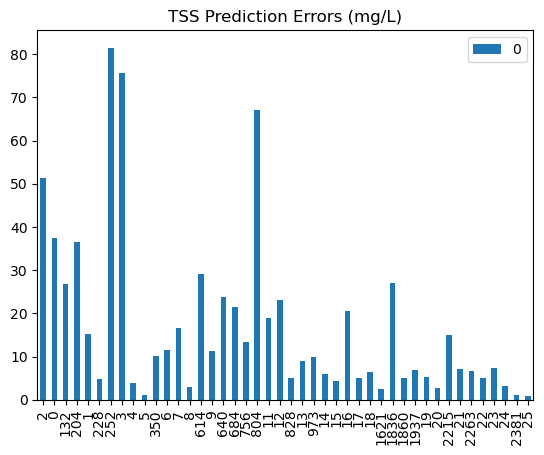

In [32]:
#Just Fusion
prediction = hlsFusion.fusionReg
actual = hlsFusion.tss

plt.figure(figsize=(4,4))
plt.scatter(actual, prediction, c='crimson')

p1 = max(max(prediction), max(actual))
p2 = min(min(prediction), min(actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - actual)
print('MAE', errors.mean())
pd.DataFrame(errors).plot(kind='bar', title = 'TSS Prediction Errors (mg/L)')

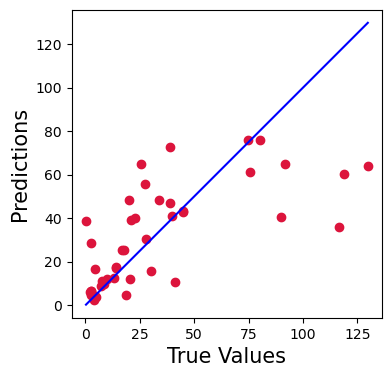

MAE 15.673336560773334


<AxesSubplot: title={'center': 'TSS Prediction Errors (mg/L)'}>

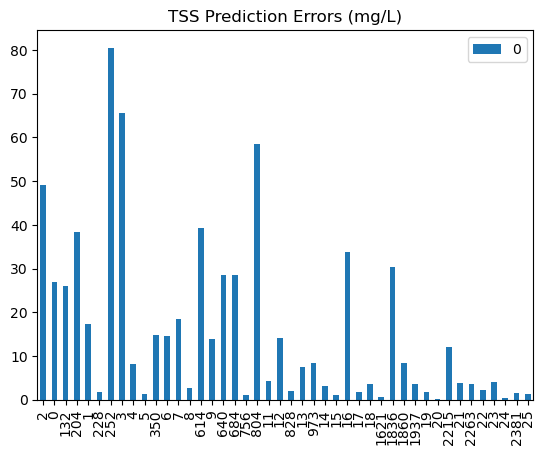

In [33]:
#Just Fusion
prediction = hlsFusion.hlsFusionReg
actual = hlsFusion.tss

plt.figure(figsize=(4,4))
plt.scatter(actual, prediction, c='crimson')

p1 = max(max(prediction), max(actual))
p2 = min(min(prediction), min(actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - actual)
print('MAE', errors.mean())
pd.DataFrame(errors).plot(kind='bar', title = 'TSS Prediction Errors (mg/L)')

## RF

In [39]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Define a Training and Testing Set



(28, 64)
(12, 64)
(28,)
(12,)


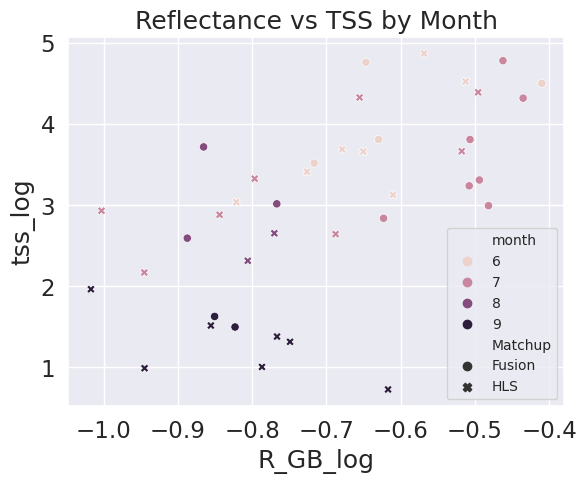

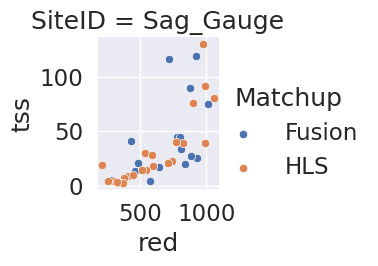

In [78]:
hlsFusion = hlsFusion[(hlsFusion['tss'] < 200)] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= hlsFusion[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'GR2_log', 'nir_log', 'GR_log',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Plot
plot = sns.scatterplot(data=hlsFusion, x="R_GB_log", y="tss_log", 
                       legend = 'brief', 
                       style = 'Matchup', hue="month")
plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS by Month')
plot

sns.set(font_scale=1.5)
g = sns.FacetGrid(hlsFusion, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


In [79]:
hlsFusion.date

2       2022-06-05
0       2022-06-05
228     2022-06-15
1       2022-06-15
252     2022-06-16
3       2022-06-16
4       2022-06-19
5       2022-06-20
350     2022-06-20
6       2022-06-26
7       2022-06-30
8       2022-07-01
614     2022-07-01
9       2022-07-02
640     2022-07-02
684     2022-07-04
756     2022-07-07
11      2022-07-09
804     2022-07-09
12      2022-07-10
828     2022-07-10
13      2022-07-15
14      2022-07-16
973     2022-07-16
15      2022-07-20
16      2022-07-25
17      2022-08-03
18      2022-08-11
1621    2022-08-12
1836    2022-08-21
1860    2022-08-22
19      2022-09-03
20      2022-09-05
2215    2022-09-06
21      2022-09-07
22      2022-09-08
23      2022-09-11
24      2022-09-13
2381    2022-09-13
25      2022-09-15
Name: date, dtype: object

# Random Forest 1: No fit


In [80]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

Trained model oob score 0.7446458214150047


In [81]:
#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(y_test, prediction))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', (RMSE_model))
print('Testing score', model.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(prediction - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Training score 0.9666934235780529
RMSE 0.564626414977565
Testing score 0.7138772094643405
Accuracy: 88.23 %


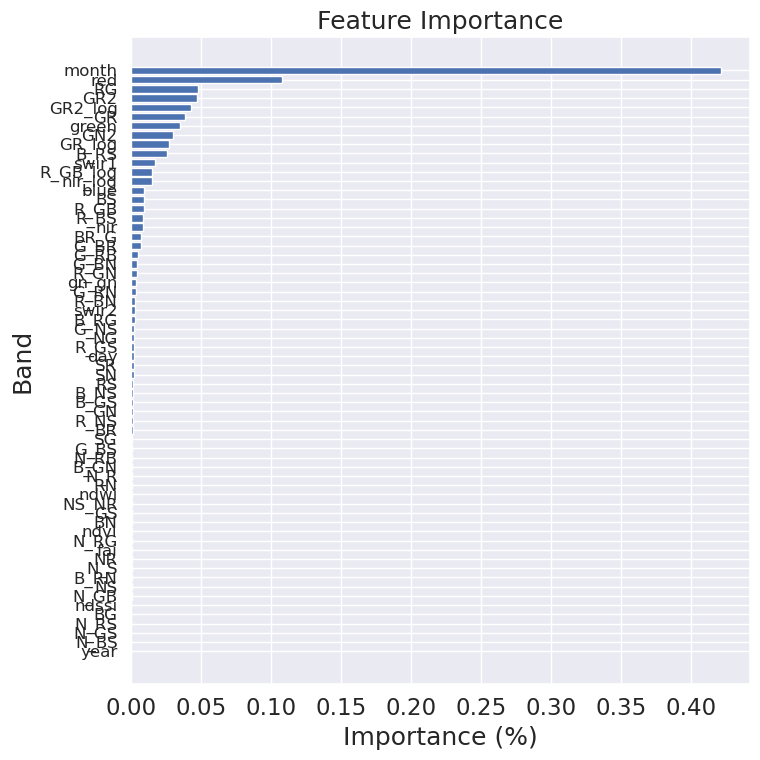

In [82]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


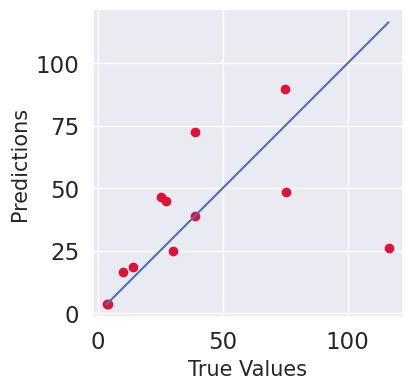

18.429453526905714


<AxesSubplot:>

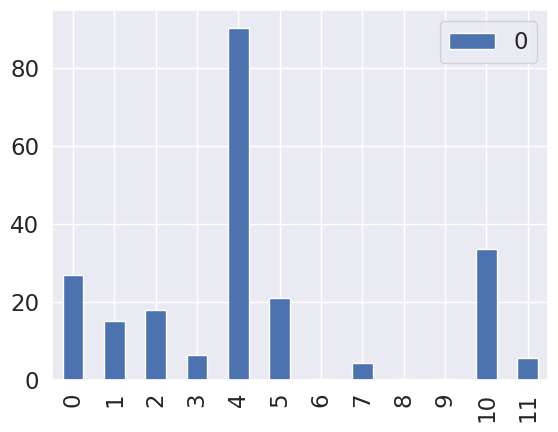

In [83]:
plt.figure(figsize=(4,4))
plt.scatter(np.exp(y_test), np.exp(prediction), c='crimson')

p1 = max(max(np.exp(prediction)), max(np.exp(y_test)))
p2 = min(min(np.exp(prediction)), min(np.exp(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(np.exp(prediction) - np.exp(y_test))
print(errors.mean())
pd.DataFrame(errors).plot(kind='bar')

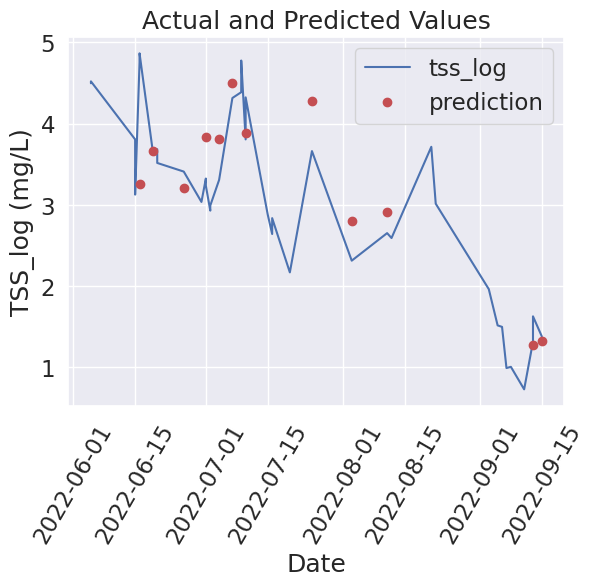

In [87]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

#PLOT
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [33]:
###takes a lot of time. See results below.

from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
param_grid = {
            "n_estimators" : [100, 150, 200, 300],
            "max_features" : ["1.0", "log2", "sqrt"],
            "max_depth"    : [1, 4, 7, 8, 10]
        }


grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
grid.fit(X_train, y_train)


forest = grid.best_estimator_

grid_prediction=forest.predict(X_test)

print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

mae_grid = mean_absolute_error(y_test, grid_prediction)
RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

print('MAE:', mae_grid)
print('RMSE:', RMSE_model_grid)

Grid best score: 0.030591072864859736 Grid best params: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 150}
MAE: 16.486700354417625
RMSE: 20.201180849673285


/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/si

In [34]:
from sklearn.metrics import r2_score

RSquared = r2_score(y_train, X_train_predict.reset_index().values)
RSquared

0.8472153299841501

# Model with some fitted params

In [35]:
#define model
model1 = RandomForestRegressor(max_depth = 8, n_estimators = 150, min_samples_split = 2, max_features = 'sqrt', bootstrap = True, oob_score= True, warm_start = False, ccp_alpha = 0, min_impurity_decrease = 0)

In [36]:
#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)
print('Test Score', model1.score(X_test, y_test))

Trained model oob score 0.9169781968437916
Test Score 0.1595860947735277


In [37]:
#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))

Training score 0.8822905848621765
RMSE 18.17297102084485
Testing score 0.1595860947735277


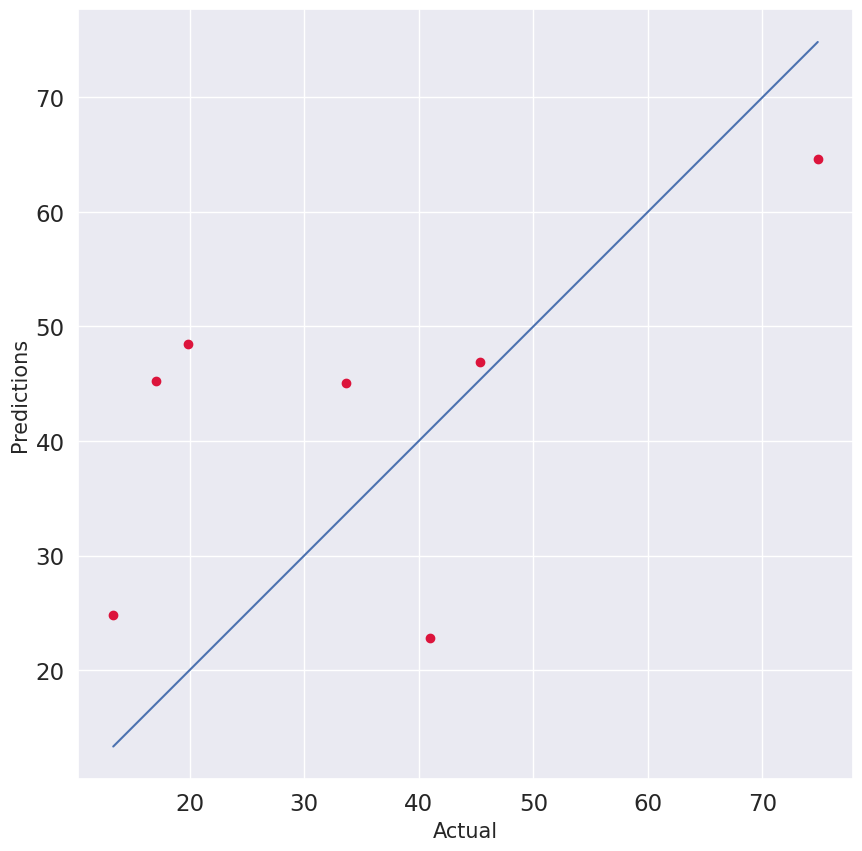

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

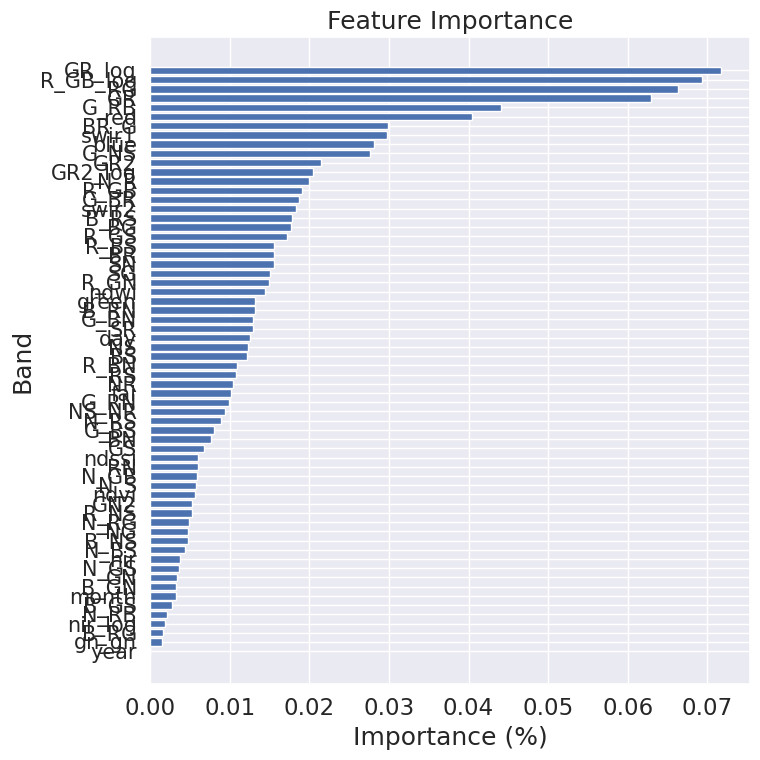

In [39]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


  Metric    RF1    RF2
0    MAE   9.79   9.16
1   RMSE  13.43  11.79


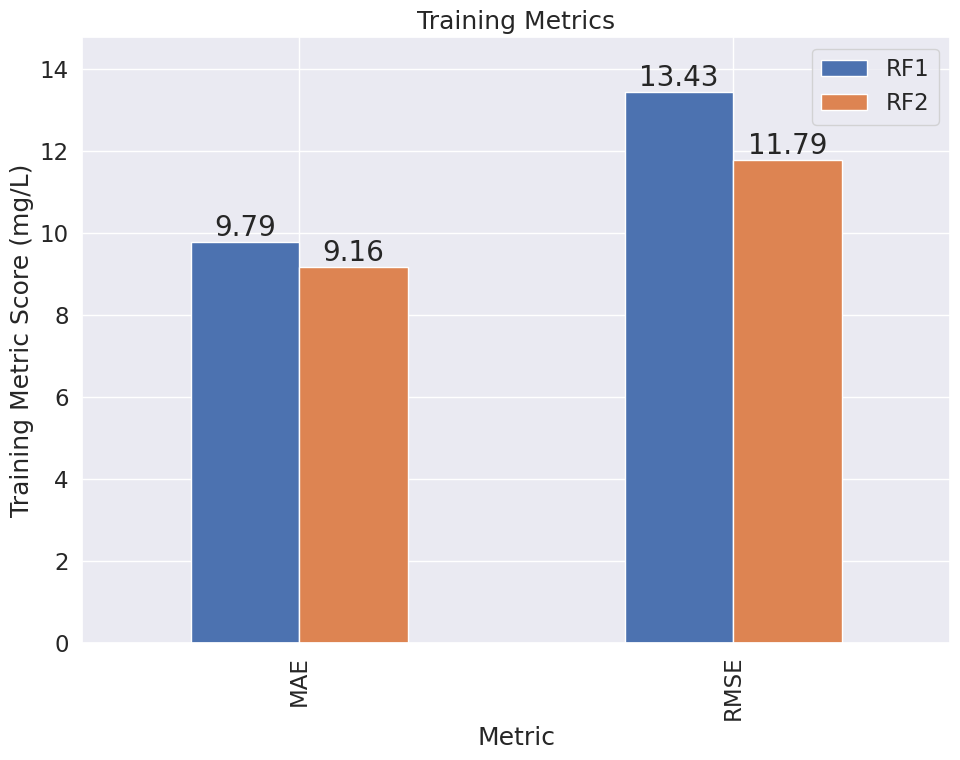

In [40]:
#Collect the test set predictions for d-h models

# model_pred = model.predict(X_test)
# model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train),model1.predict(X_train)]

model_test_pred = [model.predict(X_test),model1.predict(X_test)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['RF1', 'RF2']
metric=pd.DataFrame(['MAE','RMSE'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

  Metric    RF1    RF2
0    MAE  12.89  15.66
1   RMSE  15.80  18.17


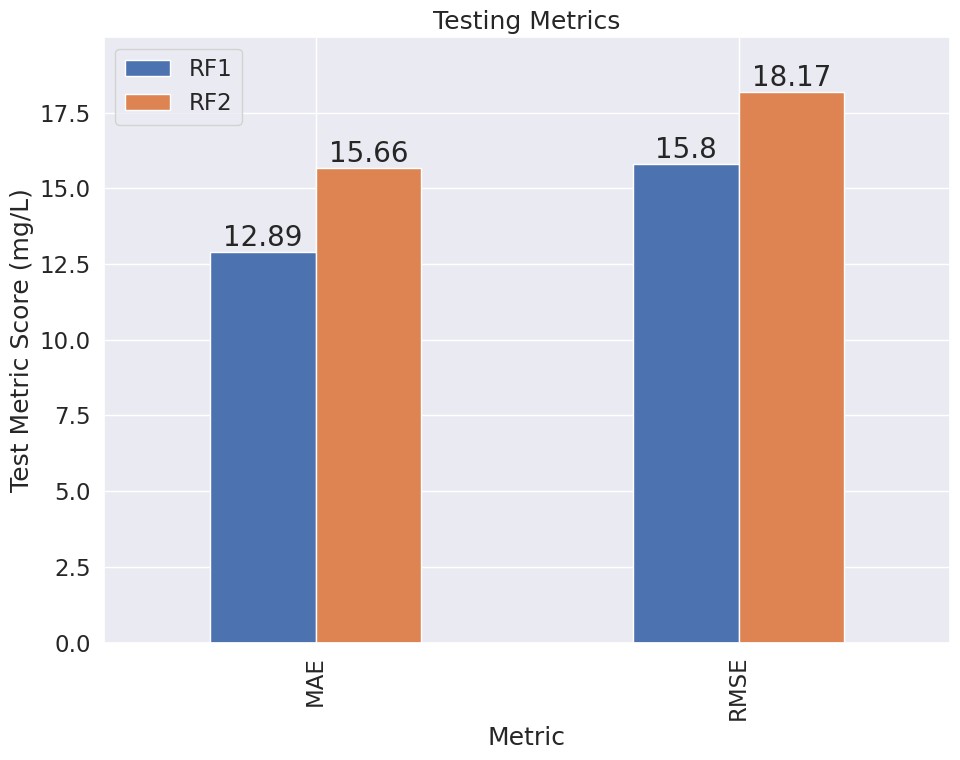

In [41]:
#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()

# Aquasat on 4 Sites

In [42]:
#AquaFusion data
aquaHuc5 = aquaHuc5[['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 
                     'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2',
                     'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 
                     'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG',
                     'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 
                     'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                     'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 
                     'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 
                     'gn_gn']]



aquaHuc5['month'] = pd.to_datetime(aquaHuc5['date']).dt.month
aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
aquaHuc5['day'] = pd.to_datetime(aquaHuc5['date']).dt.day
aquaHuc5['R_GB_log'] = np.log(aquaHuc5['R_GB'])
aquaHuc5['tss_log'] = np.log(aquaHuc5['tss'])

aquaHuc5_4Sites = aquaHuc5[aquaHuc5['SiteID'].isin(fusionSites)]

print(aquaHuc5_4Sites.columns.values.tolist())
print(len(aquaHuc5_4Sites.index))

NameError: name 'aquaHuc5' is not defined

# Define a Training and Testing Set



In [ ]:
#define a training and testing set

labels = 'tss_log'
df= aquaHuc5_4Sites[['blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 
                 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 
                 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 
                 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 
                 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 
                 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 
                 'month', 'day', 'R_GB_log', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

In [ ]:
plot = sns.scatterplot(data=aquaHuc5_4Sites, x="R_GB", y="tss", 
                       legend = 'brief', 
                       style = 'Matchup', hue="SiteID")
plt.legend(fontsize='10')
plot

sns.set(font_scale=1)
g = sns.FacetGrid(aquaHuc5_4Sites, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
g.add_legend()


# Random Forest Aquasat 4 Sites fit

Target: TSS

Input Data: 6 Bands

In [ ]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)



In [ ]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

In [ ]:
#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(y_test, prediction))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

from sklearn.metrics import r2_score

RSquared = r2_score(y_train, X_train_predict.reset_index().values)
print('RSquared', RSquared)

There is a large difference between training and testing scores. The RMSE is also large given the average values of TSS but it is within the standard deviation of the data.

In [ ]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - y_test)
pd.DataFrame(errors).plot(kind='bar')
plt.xlabel('Prediction'); plt.ylabel('TSS_log error (mg/L)'); plt.title('Absolute Errors for Predictions');

In [ ]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

In [ ]:
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

## Regressions

In [ ]:
import statsmodels.api as sm
df = hlsFusion[hlsFusion['tss'] < 200] #aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'

#define predictor and response variables
y = df['tss']
x = df['GR2']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['GR2'], df['tss'], 1)

#add points to plot
plt.scatter(df['GR2'], df['tss'], color='purple')

#add line of best fit to plot
plt.plot(df['GR2'], a*df['GR2']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2253']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss_log']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2221']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(0.01, 1, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')